In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

#Functions as defined in zoopla_clean.py
import zoopla_clean as zc

main_directory = Path.cwd().parent.as_posix()

In [14]:
zoopla_df = pd.read_csv(f"{main_directory}/databases/zooplaii-mcr.csv")

In [15]:
size_start = (len(zoopla_df))
zoopla_df.head(4)

,title,address,price,station,beds,baths,receptions
0,3 bed terraced house for sale,"Richmond Street, Worsley Mesnes, Wigan WN3","£160,000",0.9 miles Wigan North Western,3,1,1
1,2 bed flat for sale,"The Boulevard, Didsbury, Manchester M20","£235,000",1.5 miles Burnage,2,2,1
2,2 bed flat for sale,"The Boulevard, West Didsbury, Manchester M20","£240,000",1.5 miles Burnage,2,2,1
3,5 bed detached house for sale,"Verdure Avenue, Heaton, Bolton BL1","£499,950",1 miles Lostock,5,2,2


In [16]:
df = zc.clean_type(zoopla_df)
df = zc.clean_price(df)
df = zc.get_dist_to_station(df)
df = zc.clean_address(df)
df = zc.remove_outliers(df)

In [17]:
size_end = (len(df))
df.head(4)

,type,price,station,beds,baths,receptions,post_code,location
0,terraced,160000.0,0.9,3,1,1,WN3,wigan
1,flat,235000.0,1.5,2,2,1,M20,manchester
2,flat,240000.0,1.5,2,2,1,M20,manchester
3,detached,499950.0,1.0,5,2,2,BL1,bolton


In [18]:
print(f"Database of {size_start} reduced to {size_end} after cleaning")

Database of 6025 reduced to 4700 after cleaning


In [19]:
df['type'].value_counts()

flat             2447
semi-detached     838
terraced          744
detached          495
end terrace       176
Name: type, dtype: int64

In [20]:
df['post_code'].value_counts()

M5      354
M3      341
M4      276
M15     217
M50     179
       ... 
OL3       8
OL1       5
M60       3
SK16      1
OL15      1
Name: post_code, Length: 87, dtype: int64

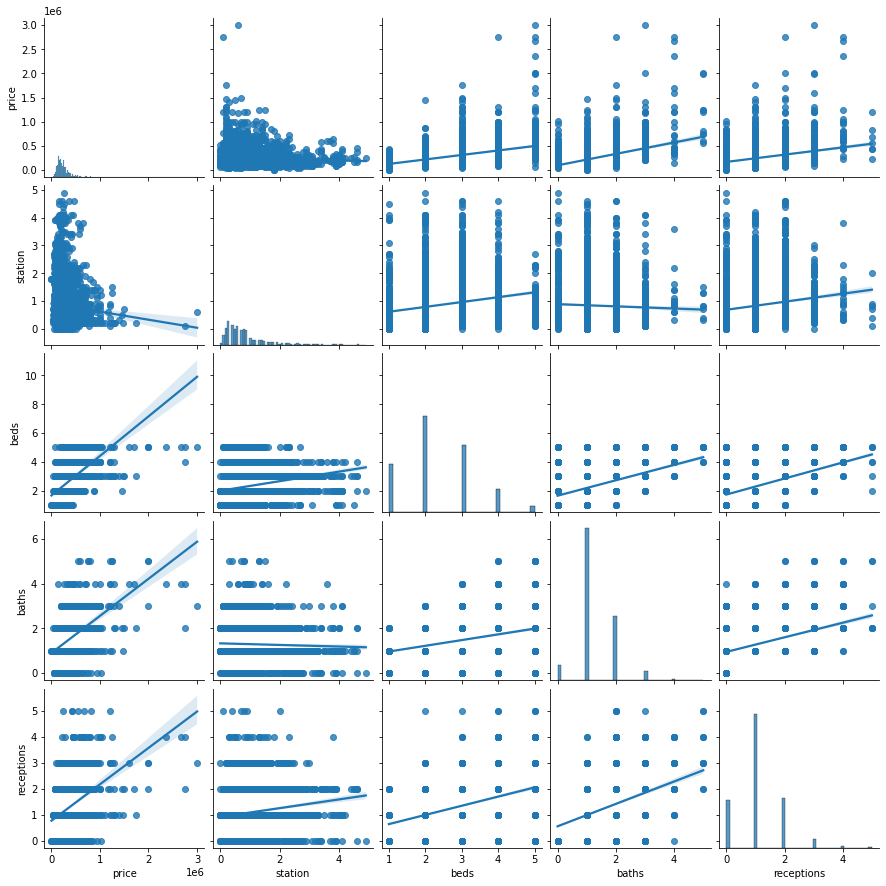

In [21]:
sns.pairplot(df, kind='reg')

<AxesSubplot:>

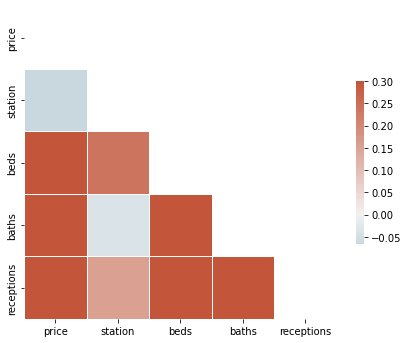

In [24]:
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})